In [2]:
# Step 1: Install Required Libraries
!pip install xgboost
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Python313\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Python313\python.exe -m pip install --upgrade pip


In [1]:
import sys
print(sys.executable)


c:\Users\prana\AppData\Local\Programs\Python\Python310\python.exe


In [9]:
!C:\Users\prana\AppData\Local\Programs\Python\Python310\python.exe -m pip install pandas
!C:\Users\prana\AppData\Local\Programs\Python\Python310\python.exe -m pip install matplotlib
!C:\Users\prana\AppData\Local\Programs\Python\Python310\python.exe -m pip install seaborn
!C:\Users\prana\AppData\Local\Programs\Python\Python310\python.exe -m pip install scikit-learn xgboost tensorflow joblib shap numpy 



You should consider upgrading via the 'C:\Users\prana\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\prana\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\prana\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.



  Using cached scikit_learn-1.6.1-cp310-cp310-win_amd64.whl (11.1 MB)
  Using cached xgboost-3.0.1-py3-none-win_amd64.whl (150.0 MB)
  Using cached tensorflow-2.19.0-cp310-cp310-win_amd64.whl (375.7 MB)
  Using cached joblib-1.5.0-py3-none-any.whl (307 kB)
  Using cached shap-0.47.2-cp310-cp310-win_amd64.whl (544 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
  Using cached scipy-1.15.3-cp310-cp310-win_amd64.whl (41.3 MB)
  Using cached gast-0.6.0-py3-none-any.whl (21 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl (71 kB)
  Using cached h5py-3.13.0-cp310-cp310-win_amd64.whl (3.0 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached requests-2.32.3-py3-none-any.whl (64 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl (7.7 kB)
  Using cached wrapt-1.17.2-cp310-cp310-win_amd64.whl (38 kB)
  Using cached grpcio-1.71.0-cp310-cp310-win_amd64.whl (4.3 MB)
  Using cached flatbuffers-

You should consider upgrading via the 'C:\Users\prana\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [6]:
# Full Anomaly Detection Project with Multiple Models "autoencoders,Random Foorest, xgboost,Isolation forest,LOC,3D-CNN"


# ======================= STEP 2: Import Libraries =======================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler

import xgboost as xgb
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import load_model

import joblib
import shap



c:\Users\prana\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
!pip install pandas 
import pandas as pd

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Python313\python.exe -m pip install --upgrade pip


In [ ]:
# Step 3: Load Real Dataset (Credit Card Fraud Detection)
df = pd.read_csv("creditcard.csv")

  # Dataset should be in the same directory

In [9]:
# Step 4: Preprocessing
X = df.drop('Class', axis=1)
y = df['Class']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [10]:
# Step 5: Autoencoder
input_dim = X_train.shape[1]
input_layer = Input(shape=(input_dim,))
encoder = Dense(14, activation="relu")(input_layer)
encoder = Dense(7, activation="relu")(encoder)
decoder = Dense(14, activation='relu')(encoder)
decoder = Dense(input_dim, activation='sigmoid')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, shuffle=True, validation_split=0.2, verbose=0)

X_test_pred = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - X_test_pred, 2), axis=1)
threshold = np.percentile(mse, 95)
y_pred_auto = (mse > threshold).astype(int)


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 538us/step


In [9]:
# # Step 6: Random Forest with Hyperparameter Tuning
# rf = RandomForestClassifier()
# param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [10, 20]}
# gs_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring='accuracy', verbose=0)
# gs_rf.fit(X_train, y_train)
# y_pred_rf = gs_rf.predict(X_test)

In [11]:
# Step 7: XGBoost with Hyperparameter Tuning
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
param_grid_xgb = {'n_estimators': [100, 200], 'max_depth': [3, 6]}
gs_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=3, scoring='accuracy', verbose=0)
gs_xgb.fit(X_train, y_train)


####################################
####################################
from joblib import dump
# Save the trained XGBoost model to a file
dump(gs_xgb.best_estimator_, "xgb_model.joblib")
####################################
####################################


y_pred_xgb = gs_xgb.predict(X_test)

c:\Users\prana\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [20:05:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\prana\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [20:05:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\prana\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [20:06:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\prana\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [20:06:00] WARNING: C:\actio

In [12]:
# Step 8: Isolation Forest
iso_forest = IsolationForest(contamination=0.01)
y_pred_iso = iso_forest.fit_predict(X_test)
y_pred_iso = [1 if x == -1 else 0 for x in y_pred_iso]

In [13]:
from sklearn.neighbors import LocalOutlierFactor


In [14]:
# Step 9: Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
y_pred_lof = lof.fit_predict(X_test)
y_pred_lof = [1 if x == -1 else 0 for x in y_pred_lof]


In [15]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv3D, MaxPooling3D, Flatten, Reshape
from tensorflow.keras.optimizers import Adam


In [16]:
X_3d_train = X_train.reshape(-1, 3, 10, 1, 1)
X_3d_test = X_test.reshape(-1, 3, 10, 1, 1)

def create_3dcnn():
    model_input = Input(shape=(3, 10, 1, 1))
    x = Conv3D(8, kernel_size=(2, 2, 1), activation='relu')(model_input)
    x = MaxPooling3D(pool_size=(1, 2, 1))(x)
    x = Flatten()(x)
    x = Dense(16, activation='relu')(x)
    output = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=model_input, outputs=output)
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

cnn_model = create_3dcnn()
cnn_model.fit(X_3d_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=0)
y_pred_cnn_prob = cnn_model.predict(X_3d_test)
y_pred_cnn = (y_pred_cnn_prob > 0.5).astype(int)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 994us/step


In [18]:
# # Step 11: Evaluation Function
# def evaluate_model(y_true, y_pred, model_name):
#     print(f"\n{model_name} Results:")
#     print(classification_report(y_true, y_pred))
#     print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
#     print(f"ROC-AUC: {roc_auc_score(y_true, y_pred):.4f}")

# evaluate_model(y_test, y_pred_auto, "Autoencoder")
# evaluate_model(y_test, y_pred_rf, "Random Forest")
# evaluate_model(y_test, y_pred_xgb, "XGBoost")
# evaluate_model(y_test, y_pred_iso, "Isolation Forest")
# evaluate_model(y_test, y_pred_lof, "Local Outlier Factor")
# evaluate_model(y_test, y_pred_cnn, "3D-CNN")


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score

# Modified evaluation function to collect all 4 metrics
def evaluate_model(y_true, y_pred, model_name, metrics_list):
    report = classification_report(y_true, y_pred, output_dict=True, zero_division=0)
    accuracy = accuracy_score(y_true, y_pred)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']

    metrics_list.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

    print(f"\n{model_name} Results:")
    print(classification_report(y_true, y_pred))
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

# Evaluate all models
metrics_list = []
evaluate_model(y_test, y_pred_auto, "Autoencoder", metrics_list)
# evaluate_model(y_test, y_pred_rf, "Random Forest", metrics_list)
evaluate_model(y_test, y_pred_xgb, "XGBoost", metrics_list)
evaluate_model(y_test, y_pred_iso, "Isolation Forest", metrics_list)
evaluate_model(y_test, y_pred_lof, "Local Outlier Factor", metrics_list)
evaluate_model(y_test, y_pred_cnn, "3D-CNN", metrics_list)

# # Convert to DataFrame
# df_metrics = pd.DataFrame(metrics_list)

# # Melt for seaborn plotting
# df_melted = df_metrics.melt(id_vars='Model', var_name='Metric', value_name='Score')

# # Plot
# plt.figure(figsize=(12, 6))
# ax = sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric')

# # Add vertical annotations on bars
# for p in ax.patches:
#     height = p.get_height()
#     if height > 0.85:  # If the bar is near the top, place the text below
#         offset = -10
#     else:  # Otherwise, place the text on top
#         offset = 5

#     ax.annotate(f'{height:.4f}',
#                 (p.get_x() + p.get_width() / 2., height),
#                 ha='center', va='center', fontsize=10,
#                 color='black', xytext=(0, offset), textcoords='offset points',
#                 rotation=90)  # Make the annotation vertical

# plt.title('Model Comparison: Accuracy, Precision, Recall, F1-Score')
# plt.ylim(0, 1)
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()



Autoencoder Results:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56864
           1       0.03      0.85      0.06        98

    accuracy                           0.95     56962
   macro avg       0.51      0.90      0.52     56962
weighted avg       1.00      0.95      0.97     56962

Accuracy: 0.9512
Precision: 0.9981
Recall: 0.9512
F1-Score: 0.9734

XGBoost Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.81      0.87        98

    accuracy                           1.00     56962
   macro avg       0.98      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy: 0.9996
Precision: 0.9996
Recall: 0.9996
F1-Score: 0.9996

Isolation Forest Results:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.10      0.60   

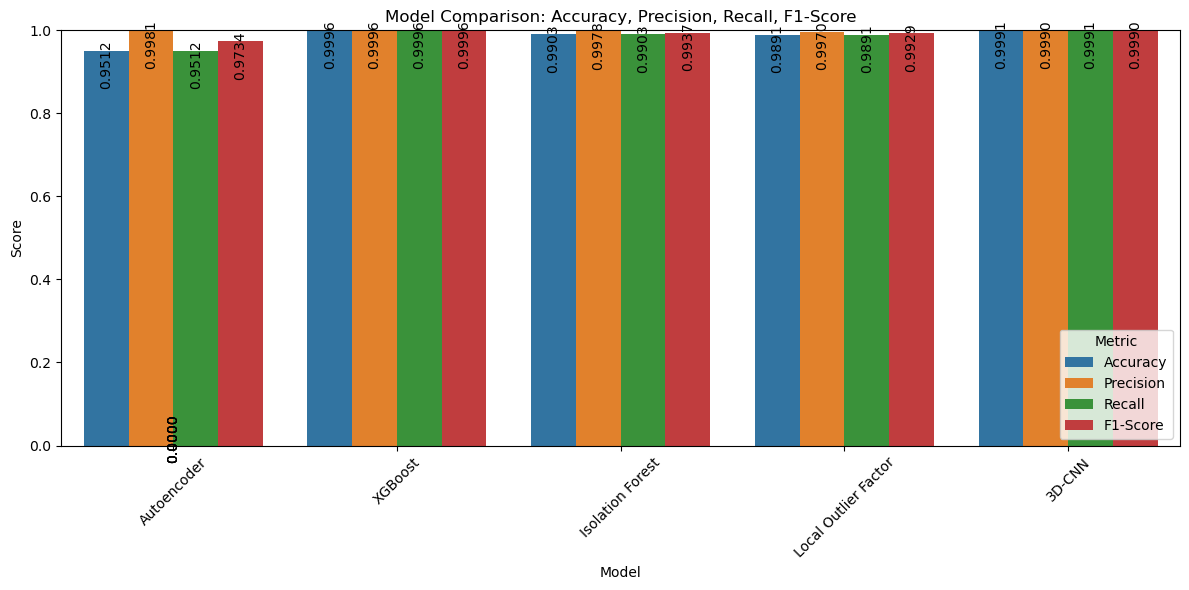

In [19]:


# Convert to DataFrame
df_metrics = pd.DataFrame(metrics_list)

# Melt for seaborn plotting
df_melted = df_metrics.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric')

# Add vertical annotations on bars
for p in ax.patches:
    height = p.get_height()
    if height > 0.85:  # If the bar is near the top, place the text below
        offset = -10
    else:  # Otherwise, place the text on top
        offset = 5

    ax.annotate(f'{height:.4f}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10,
                color='black', xytext=(0, offset), textcoords='offset points',
                rotation=90)  # Make the annotation vertical

plt.title('Model Comparison: Accuracy, Precision, Recall, F1-Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

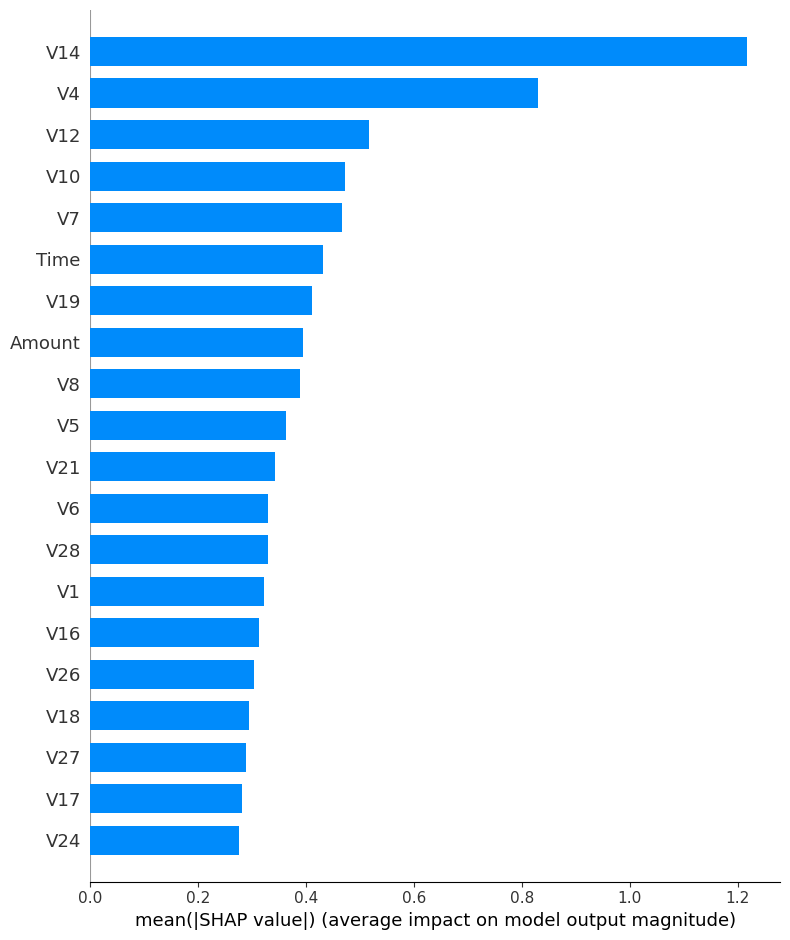

In [21]:
# Step 12: SHAP Explanations for XGBoost
explainer = shap.TreeExplainer(gs_xgb.best_estimator_)
shap_values = explainer.shap_values(X_test[:100])
shap.summary_plot(shap_values, features=X_test[:100], feature_names=X.columns, plot_type='bar')

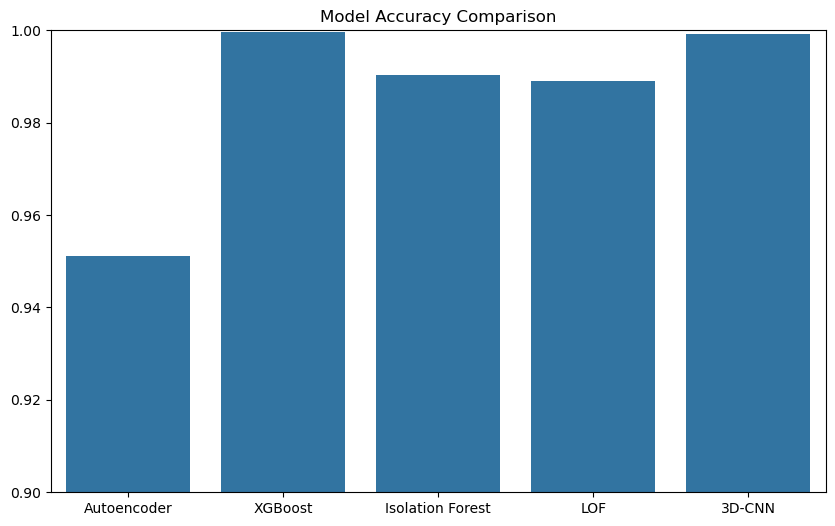

In [24]:
# Step 13: Visual Comparison (Accuracy)
# models = ['Autoencoder', 'Random Forest', 'XGBoost', 'Isolation Forest', 'LOF', '3D-CNN']
models = ['Autoencoder',  'XGBoost', 'Isolation Forest', 'LOF', '3D-CNN']
accuracies = [
    accuracy_score(y_test, y_pred_auto),
    # accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_xgb),
    accuracy_score(y_test, y_pred_iso),
    accuracy_score(y_test, y_pred_lof),
    accuracy_score(y_test, y_pred_cnn)
]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Model Accuracy Comparison')
plt.ylim(0.9, 1.0)
plt.show()

In [25]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve


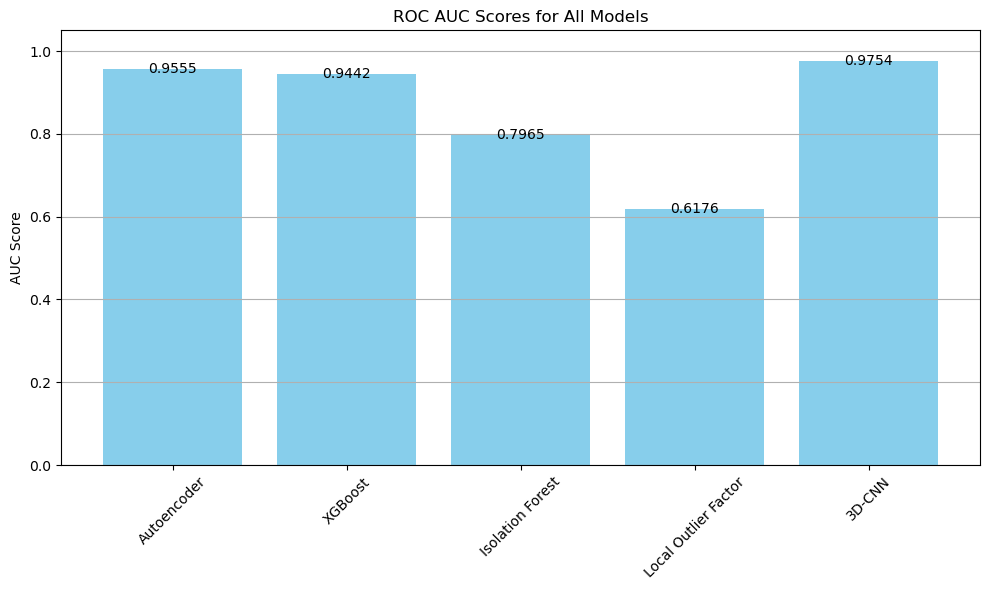

In [27]:
# # Step 14: ROC Curve AUC Bar Chart
# predictions = {
#     "Autoencoder": mse,
#     "Random Forest": gs_rf.predict_proba(X_test)[:, 1],
#     "XGBoost": gs_xgb.predict_proba(X_test)[:, 1],
#     "Isolation Forest": y_pred_iso,
#     "Local Outlier Factor": y_pred_lof,
#     "3D-CNN": y_pred_cnn_prob.flatten()
# }

# roc_auc_scores = {}
# for name, pred in predictions.items():
#     try:
#         roc_auc = roc_auc_score(y_test, pred)
#         roc_auc_scores[name] = roc_auc
#     except Exception as e:
#         print(f"Could not compute ROC AUC for {name}: {e}")

# # Plotting Bar Chart
# plt.figure(figsize=(10, 6))
# plt.bar(roc_auc_scores.keys(), roc_auc_scores.values(), color='skyblue')
# plt.title("ROC AUC Scores for All Models")
# plt.ylabel("AUC Score")
# plt.ylim(0, 1.05)
# plt.grid(axis='y')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()




import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

# ROC AUC Predictions for models
predictions = {
    "Autoencoder": mse,  # Ensure mse is the correct prediction values
    # "Random Forest": gs_rf.predict_proba(X_test)[:, 1],
    "XGBoost": gs_xgb.predict_proba(X_test)[:, 1],
    "Isolation Forest": y_pred_iso,
    "Local Outlier Factor": y_pred_lof,
    "3D-CNN": y_pred_cnn_prob.flatten()
}

# Compute ROC AUC scores
roc_auc_scores = {}
for name, pred in predictions.items():
    try:
        roc_auc = roc_auc_score(y_test, pred)
        roc_auc_scores[name] = roc_auc
    except Exception as e:
        print(f"Could not compute ROC AUC for {name}: {e}")

# Plotting Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(roc_auc_scores.keys(), roc_auc_scores.values(), color='skyblue')
plt.title("ROC AUC Scores for All Models")
plt.ylabel("AUC Score")
plt.ylim(0, 1.05)
plt.grid(axis='y')
plt.xticks(rotation=45)

# Add centered vertical annotations on bars
for p in plt.gca().patches:
    height = p.get_height()

    # Adding annotations centered on the bars
    plt.gca().annotate(f'{height:.4f}',
                       (p.get_x() + p.get_width() / 2., height),  # Position in the center of each bar
                       ha='center', va='center', fontsize=10,
                       color='black', xytext=(0, 0), textcoords='offset points')  # Make the annotation vertical and centered

plt.tight_layout()
plt.show()


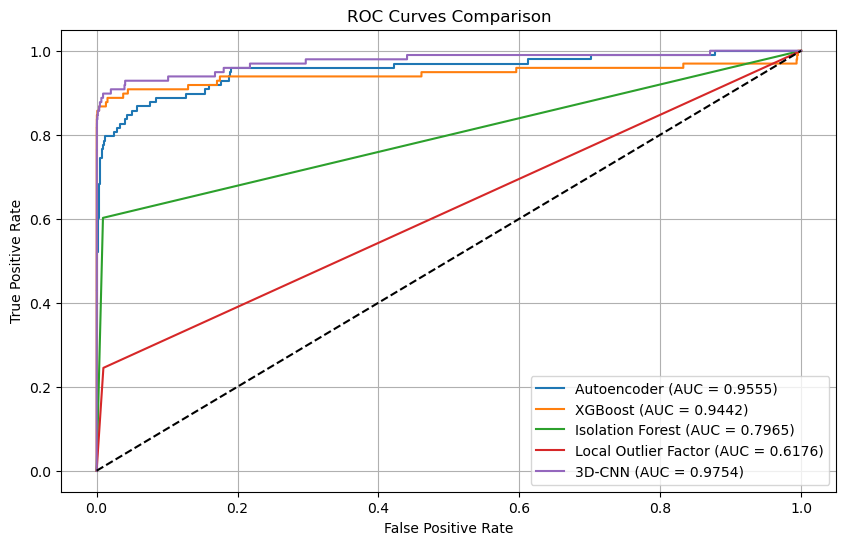

In [28]:
# Step 15: ROC Curves with Probabilities if available
predictions = {
    "Autoencoder": mse,
    # "Random Forest": gs_rf.predict_proba(X_test)[:, 1],
    "XGBoost": gs_xgb.predict_proba(X_test)[:, 1],
    "Isolation Forest": y_pred_iso,
    "Local Outlier Factor": y_pred_lof,
    "3D-CNN": y_pred_cnn_prob.flatten()
}

plt.figure(figsize=(10, 6))
for name, pred in predictions.items():
    try:
        fpr, tpr, _ = roc_curve(y_test, pred)
        auc_score = roc_auc_score(y_test, pred)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.4f})")
    except Exception as e:
        print(f"Could not plot ROC for {name}: {e}")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison")
plt.legend()
plt.grid(True)
plt.show()


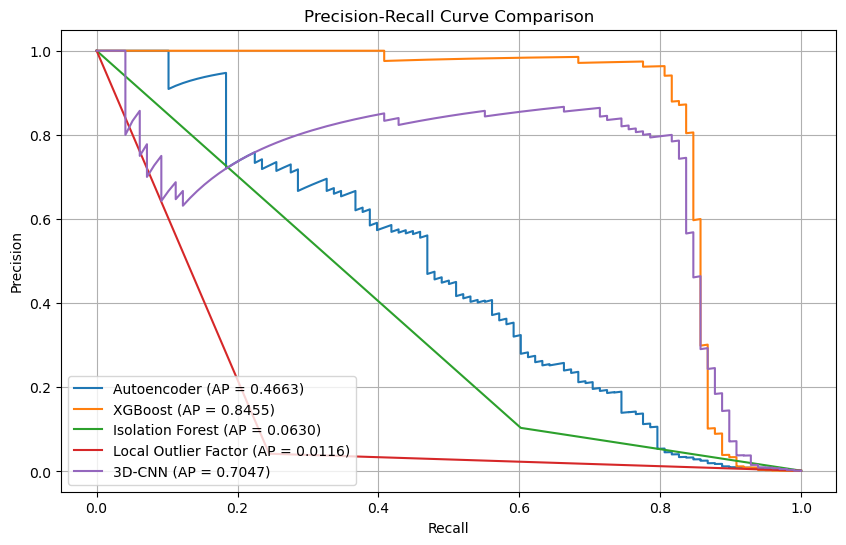

In [29]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(10, 6))
for name, pred in predictions.items():
    try:
        precision, recall, _ = precision_recall_curve(y_test, pred)
        avg_prec = average_precision_score(y_test, pred)
        plt.plot(recall, precision, label=f"{name} (AP = {avg_prec:.4f})")
    except Exception as e:
        print(f"Could not plot PR curve for {name}: {e}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()


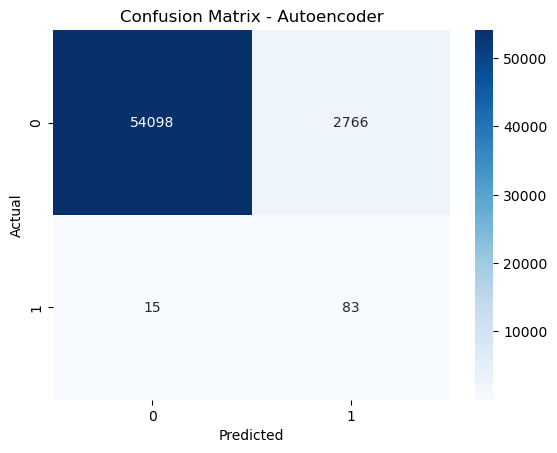

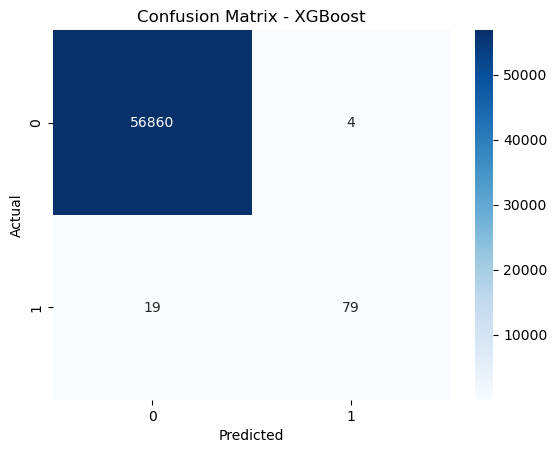

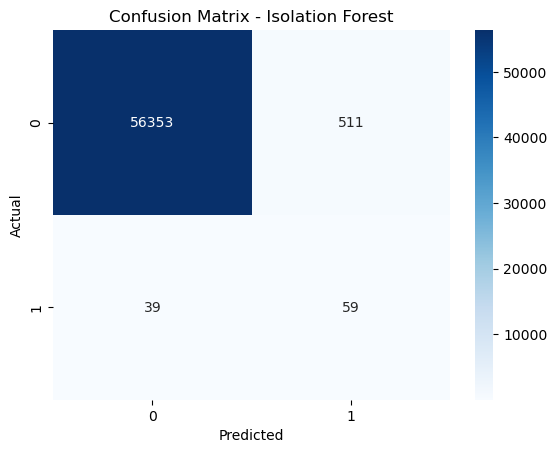

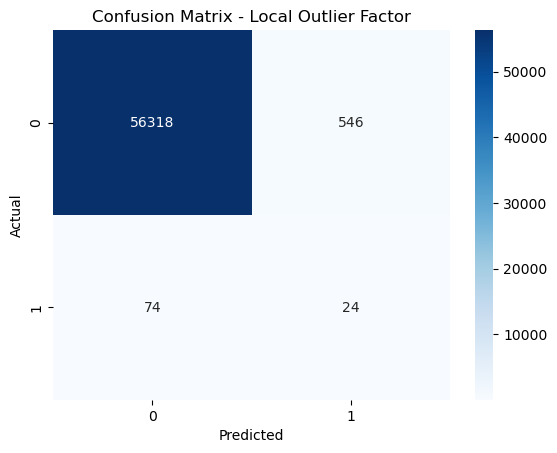

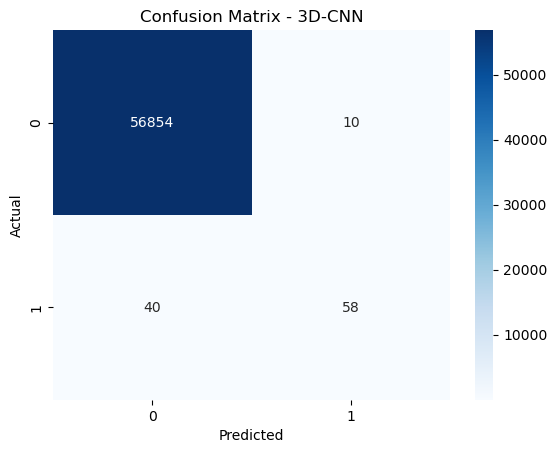

In [31]:
from sklearn.metrics import confusion_matrix

model_preds = {
    "Autoencoder": y_pred_auto,
    # "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb,
    "Isolation Forest": y_pred_iso,
    "Local Outlier Factor": y_pred_lof,
    "3D-CNN": y_pred_cnn.flatten()
}

for name, y_pred in model_preds.items():
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [33]:
!pip install streamlit